![5.2.5](img/5.2.5.png)

In [1]:
l = 16
da = 4
ac = 6
cb = 6
w = 1000
p = 5000
B = 9
b = 4
H = 6
h = 4
#--Reaction
from sympy import *
from sympy.physics.continuum_mechanics.beam import Beam
E, I = symbols('E, I')
R1, R2 = symbols('R1, R2')
bm = Beam(l, E, I)
bm.apply_load(R1, da, -1)
bm.apply_load(R2, l, -1)
bm.apply_load(w, 0, 0, end=da)
bm.apply_load(p, da+ac, -1)
# find reaction load at A, B
bm.bc_deflection = [(da, 0), (l, 0)]
bm.solve_for_reaction_loads(R1, R2)
print(bm.reaction_loads)
# reverse dir
A, B = ( -x for x in bm.reaction_loads.values())
A, B

{R1: -21500/3, R2: -5500/3}


(21500/3, 5500/3)

In [10]:
# moment at A, C
MA = 0.5*(-w*da)*da  # triangle shape
MC = 6*B             # square shape
print(f"MA={MA} feet")
print(f"MC={MC} feet")
MA = abs(MA*12)   # feet to inch
MC = MC*12
print(f"MA={MA} inch")
print(f"MC={MC} inch")  

MA=-8000.0 feet
MC=11000 feet
MA=96000.0 inch
MC=132000 inch


In [11]:
# centroid
c1 = ( (0.5*h)*B*h + (h+0.5*H)*b*H )/(B*h + b*H)
c2 = ( (0.5*H)*b*H + (H+0.5*h)*B*h )/(B*h + b*H)
print(f"Centroid=[{c1:.3f},{c2:.3f}]")

Centroid=[2.016,7.984]


In [12]:
# inertia
i = (B/3)*(c1**3 -(c1-h)**3) + (b/3)*(c2**3 + (H-c2)**3)
print(f"i={i:.3f}")

i=10447.821


In [13]:
# modulus section
z1 = i/c1
z2 = i/c2
print(f"Z=[{z1:.3f},{z2:.3f}]")

Z=[5181.653,1308.646]


sigma A = [18.5269055719082,73.3582867216288]
sigma B = [100.867644242240,25.4744951613737]
max tension = 100.867644242240


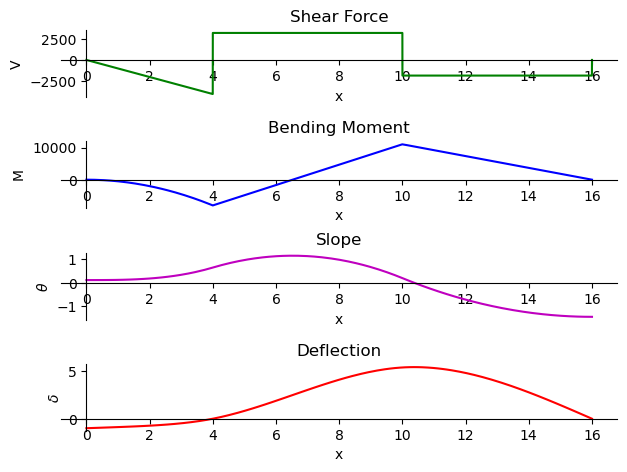

In [14]:
# sigma = m/z
A_T = MA/z1
A_C = MA/z2
C_T = MC/z2
C_C = MC/z1
print(f"sigma A = [{A_T},{A_C}]")
print(f"sigma B = [{C_T},{C_C}]")
print(f"max tension = {max(A_T,C_T)}")
bm.plot_loading_results(subs={E: 10e9, I: 2e-6})